# Plugins in mpld3

One of the most interesting features of mpld3 is the ability to add plugins to your plots.  Plugins are objects which define new, interactive functionality for your visualizations.  There are several built-in to the mpld3 package, and there is a well-defined API to create your own.  We'll briefly walk through these below.

We'll start with the standard set of imports for working with mpld3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

Just to make sure it's working, let's create a simple plot:

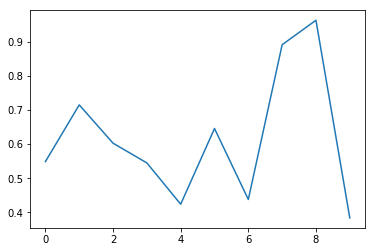

In [2]:
np.random.seed(0)
plt.plot(np.random.rand(10));

## The Purpose of Plugins

Plugins, in a word, are meant to add new browser-based behavior to a matplotlib plot. The mpld3 package enables several plugins by default, namely the ``Reset`` button, the ``Zoom`` button, and the ``BoxZoom`` button. Note that plugins may or may not be accompanied by buttons.

To see a plot with no plugins attached, we can call the ``plugins.clear`` function and remove all plugins from the figure:

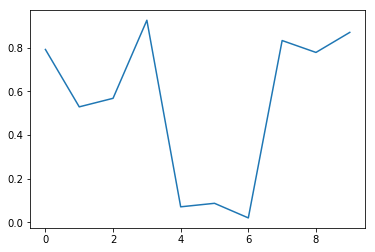

In [3]:
from mpld3 import plugins

fig, ax = plt.subplots()
ax.plot(np.random.random(10))
plugins.clear(fig)  # clear all plugins from the figure

Notice that now the figure, while still rendered in D3, does not have any interactive elements. To recover the default interactive elements, we can add them back explicitly. For example, let's say we prefer to switch the order of the ``Zoom`` and ``BoxZoom`` tools in our toolbar:

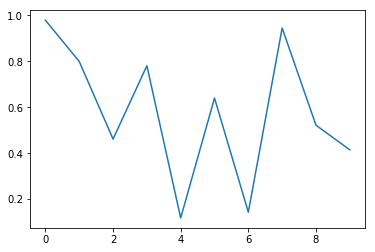

In [4]:
from mpld3 import plugins

fig, ax = plt.subplots()
ax.plot(np.random.random(10))
plugins.clear(fig)  # clear all plugins from the figure

plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())

Notice that the three buttons are now in a different order than they are by default; we've customized our toolbar using the built-in plugin tools.

## Beyond the Default Plugins

There are many other plugins you can use which are built-in to mpld3, and the list is growing. For example, here's a plugin that allows tooltips (i.e. information which appears when you hover your mouse over points):

In [ ]:
fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

In [ ]:
# plugins.PointHTMLTooltip()
plugins.PointClickableHTMLTooltip()

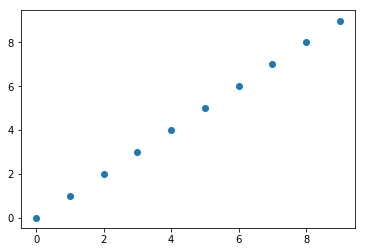

In [29]:
import matplotlib.pyplot as plt
from mpld3 import plugins
fig, ax = plt.subplots(1,1)
xx = yy = range(10)
scat = ax.scatter(xx, range(10))

def marq(x, y):
    return "<marquee>It works!<br><h1>{}, {}</h1></marquee>".format(x, y)

targets = map(marq, zip(xx, yy))

def f(x, y):
    return "{}, {}".format(x,y)

labels = map(f, zip(xx, yy))

In [30]:
plugins.connect(fig, plugins.PointClickableHTMLTooltip(scat, labels=labels, targets=targets))

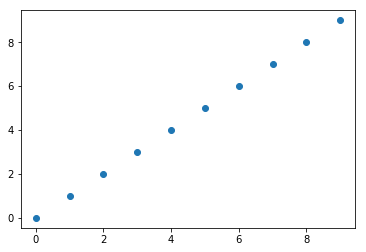

In [38]:
import matplotlib.pyplot as plt
from mpld3 import fig_to_html, plugins
fig, ax = plt.subplots()
points = ax.plot(range(10), 'o')

# labels = ['<h1>{title}</h1>'.format(title=i) for i in range(10)]

labels = ['<div background-color:"red";><h1>{title}</h1></div>'.format(title=i) for i in range(10)]

plugins.connect(fig, plugins.PointHTMLTooltip(points[0], labels))
# fig_to_html(fig)

In [8]:
dir(plugins)

['BoxZoom',
 'DEFAULT_PLUGINS',
 'InteractiveLegendPlugin',
 'LineHTMLTooltip',
 'LineLabelTooltip',
 'LinkedBrush',
 'MousePosition',
 'MouseXPosition',
 'PluginBase',
 'PointClickableHTMLTooltip',
 'PointHTMLTooltip',
 'PointLabelTooltip',
 'Reset',
 'Zoom',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clear',
 'collections',
 'connect',
 'get_id',
 'get_plugins',
 'json',
 'matplotlib',
 'uuid']

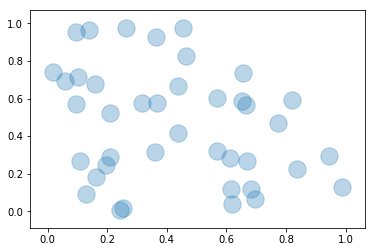

In [5]:
fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

TypeError: Object of type 'map' is not JSON serializable

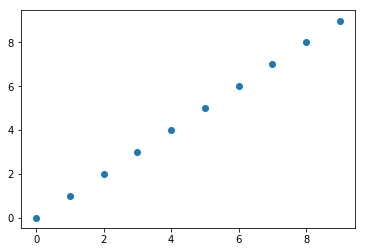

In [39]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from mpld3 import plugins

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
xx = yy = range(10)
scat = ax.scatter(xx, range(10))
targets = ["<marquee>It works!<br><h1>{}, {}</h1></marquee>".format(x, y) for (x,y) in zip(xx, yy)]
labels = ["{}, {}".format(x,y) for (x,y) in zip(xx,yy)]

from mpld3.plugins import PointClickableHTMLTooltip, MouseXPosition
plugins.connect(fig, PointClickableHTMLTooltip(scat, labels=labels, targets=targets))
plugins.connect(fig, MouseXPosition())

Other available plugins can be viewed in the [example gallery](http://mpld3.github.io/examples/index.html) and in other parts of the [mpld3 documentation](http://mpld3.github.io).

## Paving Your Own Way...

While the built-in plugins are useful, one of the nicest features of mpld3 is the ability to define your own custom behaviors. This requires a bit of familiarity with both Python and Javascript, as well as some level of knowledge of the javascript side of the mpld3 implementation. Here we'll walk through the process of creating a some plugins to do various simple tasks.

First, let's do a silly plugin which writes "hello world" on the figure:

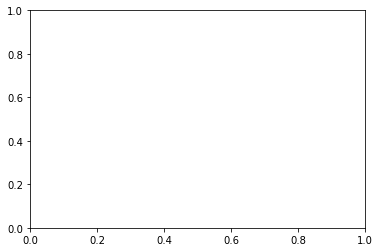

In [6]:
class HelloWorld(plugins.PluginBase):  # inherit from PluginBase
    """Hello World plugin"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("helloworld", HelloWorld);
    HelloWorld.prototype = Object.create(mpld3.Plugin.prototype);
    HelloWorld.prototype.constructor = HelloWorld;
    function HelloWorld(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    HelloWorld.prototype.draw = function(){
        this.fig.canvas.append("text")
            .text("hello world")
            .style("font-size", 72)
            .style("opacity", 0.3)
            .style("text-anchor", "middle")
            .attr("x", this.fig.width / 2)
            .attr("y", this.fig.height / 2)
    }
    """
    def __init__(self):
        self.dict_ = {"type": "helloworld"}
        
fig, ax = plt.subplots()
plugins.connect(fig, HelloWorld())

It worked! Notice here that the "hello world" text *did not come from Python*, but from the javascript code defined in the plugin.  The code in the ``JAVASCRIPT`` class variable is injected into the javascript which defines the figure, which we can see by calling ``fig_to_html` explicitly. If you were to copy this code into an html file and open it with your browser, it would show the above figure.

In [7]:
print(mpld3.fig_to_html(fig, template_type="simple"))


<script type="text/javascript" src="https://mpld3.github.io/js/d3.v3.min.js"></script>
<script type="text/javascript" src="https://mpld3.github.io/js/mpld3.v0.2git.js"></script>

<style>

</style>

<div id="fig_el926444003186729531601938"></div>
<script type="text/javascript">

  !function(mpld3){
       
    mpld3.register_plugin("helloworld", HelloWorld);
    HelloWorld.prototype = Object.create(mpld3.Plugin.prototype);
    HelloWorld.prototype.constructor = HelloWorld;
    function HelloWorld(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    HelloWorld.prototype.draw = function(){
        this.fig.canvas.append("text")
            .text("hello world")
            .style("font-size", 72)
            .style("opacity", 0.3)
            .style("text-anchor", "middle")
            .attr("x", this.fig.width / 2)
            .attr("y", this.fig.height / 2)
    }
    
       mpld3.draw_figure("fig_el926444003186729531601938", {"axes": [{"xlim": [0.0, 1.0], "yscale":

There, right in the middle of our script, is our ``HelloWorld`` plugin definition!

Note also that in the JSON definition at the bottom of the output, we see the following piece: ``"plugins": [..., {"type": "helloworld"}]``. This is what actually tells the ``draw_figure`` command that we want to connect the ``HelloWorld`` plugin to the figure.

### What's happening in ``HelloWorld``

Let's take a look at the ``HelloWorld`` javascript code.  First we have this piece:
``` javascript   
mpld3.register_plugin("helloworld", HelloWorld);
```
This is the first piece of code you should have for every plugin. The function ``register_plugin(key, object)`` associates a ``key`` with a given plugin object, so that this key can be referenced in the figure JSON, as we saw above with the ``"helloworld"`` key.

``` javascript
HelloWorld.prototype = Object.create(mpld3.Plugin.prototype);
HelloWorld.prototype.constructor = HelloWorld;
function HelloWorld(fig, props){
    mpld3.Plugin.call(this, fig, props);
};
```

This piece might looks complicated, but to an experienced javascript programmer it's easily recognized as an object definition. Javascript is built on *prototypical inheritance*, which is a different approach than the class-based inheritance that you may be familiar with in Python.  What these lines do is to create a ``HelloWorld`` type which inherits from ``mpld3.Plugin``, and is initialized by the specified function.

``` javascript
HelloWorld.prototype.draw = function(){
    this.fig.canvas.append("text")
        .text("hello world")
        .style("font-size", 72)
        .style("opacity", 0.3)
        .style("text-anchor", "middle")
        .attr("x", this.fig.width / 2)
        .attr("y", this.fig.height / 2)
}
```

This is the meat of the plugin: when the figure is drawn to the web page, the ``draw`` method of the plugin is called. Anyone familiar with ``d3`` should recognize exactly what's happening here.  ``this.fig`` references the figure object associated with the plugin instance, and the figure object holds a ``d3`` selection named ``canvas``. The canvas is the root element within the SVG created by ``mpld3.draw_figure``.

We use standard d3 syntax to add an SVG text element to the canvas, and then adjust the content, position, and style to be what we want.

Finally, we can take a look at the Python side of things, snipping out the javascript for the time being:
``` python
class HelloWorld(plugins.PluginBase):
    JAVASCRIPT = """ <snip> """
    def __init__(self):
        self.dict_ = {"type": "helloworld"}
```
The ``__init__`` function simply defines a class member ``dict_``, which is a JSON serializable dictionary that is used to pass options from Python to javascript. When the plugin is connected to a figure, a JSON representation of ``dict_`` will be put in the ``"plugins"`` list, as we saw in the printout above.  Every plugin should have a ``"type"`` element in the ``dict_``, which should match the key used in ``mpld3.register_plugin`` on the javascript side.

That's all there is to it!

## A More Interesting Example: Point Information

The above example may seem like an incredibly complicated way to add some text to the plot, and it is. The real power of plugins, though, comes from the ability to use d3 to poke around in the Document Object Model (DOM) and modify the elements based on user input.

Here we'll do a more interesting plugin: we'll make it so that clicking on points brings up an alert box with information about the point.

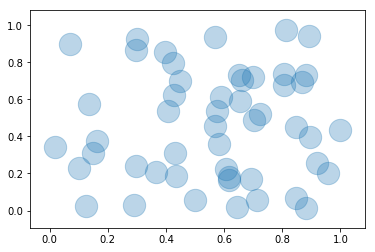

In [7]:
from mpld3 import utils

class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        obj.elements().on("mousedown",
                          function(d, i){alert("clicked on points[" + i + "]");});
    }
    """
    def __init__(self, points):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points)}
        
fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(50), np.random.rand(50),
                    s=500, alpha=0.3)

plugins.connect(fig, ClickInfo(points))

If you click on any of the above points, you should see a browser alert box which tells you which point you clicked on!

There are just a couple extra pieces here beyond what we saw in the previous example.  On the javascript side, we have this addition to the class prototype definition:
``` javascript
ClickInfo.prototype.requiredProps = ["id"];
```
This tells us that the plugin expects to be passed a property named ``"id"``, which in this case points to the plot elements that are the subject of the interaction.  This id is generated by the python script, and we can find it using the ``utils.get_id`` utility:

In [9]:
utils.get_id(points)

'el92644400590224'

This output is passed to the ``dict_`` attribute in Python, which is in turn passed to the ``props`` attribute in Javascript.  Because the same ``get_id`` utility is used to find the id when the points are first drawn, we can use this id to locate the correct plot elements.  Finally, we do some typical ``d3`` gymnastics and write the following:
``` javascript
var obj = mpld3.get_element(this.props.id);
obj.elements().on("mousedown",
                  function(d, i){alert("clicked on points[" + i + "]");});
```
The ``mpld3.get_element`` function in javascript essentially does the opposite of the ``utils.get_id`` function in Python: it maps from the id to the Javascript object containing the points.  Once the elements of this plot object are accessed, all it takes is a simple ``on("mousedown", ...)`` command to add the desired behavior.

## Conclusion

We've just scraped the surface of what you can do with mpld3 plugins, but hopefully the above discussion is enough to get you started in defining your own interactive behaviors.  With a familiarity with D3, the possibilities really are endless. For ideas, you can check out some of the plugins built-in to the mpld3 library (they're defined just like this, except much of the javascript is bundled with the main mpld3 source!). There are also some interesting examples in the [mpld3 gallery](http://mpld3.github.io/examples/index.html).  If you come up with something you'd like to share, feel free to submit it as a pull request to the main mpld3 gallery: we'd love to see it!